# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [8]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores range from 220 to 800 while GPA ranges from 2.26 to 4.  Standard deviation is represented in the unit of measurement of the given variable.  We are currently unable to compare the standard deviations because GRE points are not the same as GPA points.  We would first need to standardize the variables if we wanted to compare their standard deviations.

#### Question 4. Drop data points with missing data


In [15]:
print(df_raw.dropna().describe())
df_clean = df_raw.dropna()
print(df_raw.isnull().sum())
df_clean.isnull().sum()

            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000
admit       0
gre         2
gpa         2
prestige    1
dtype: int64


admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The sum of isnull on the raw data include gre with 2 missing, gpa with 2 missing and prestige with 1 missing.  The sum of isnull on the clean data is 0 for all columns.

#### Question 6. Create box plots for GRE and GPA

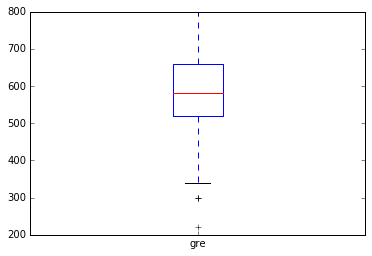

In [18]:
df_clean[['gre']].plot(kind='box')

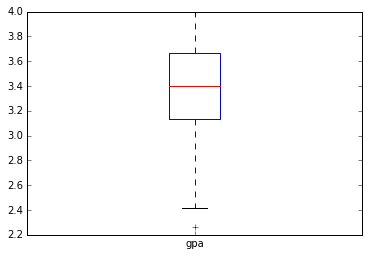

In [19]:
df_clean[['gpa']].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The red line shows the median.  The blue lines show each quartile.  The + shows outliers.

#### Question 8. Describe each distribution 

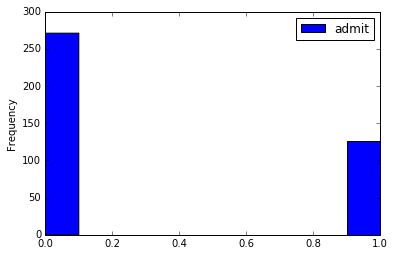

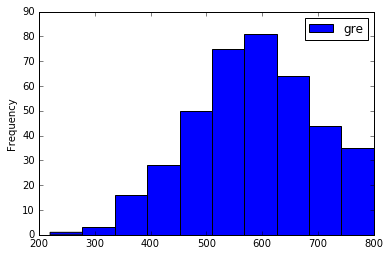

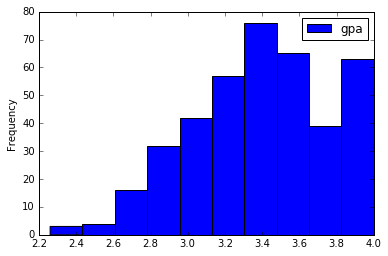

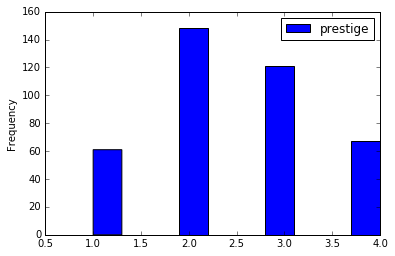

In [21]:
df_clean[['admit']].plot(kind='hist')
df_clean[['gre']].plot(kind='hist')
df_clean[['gpa']].plot(kind='hist')
df_clean[['prestige']].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [24]:
print(df_clean['gpa'].kurt())
df_clean['gre'].kurt()

-0.563569899522


-0.33286435465143427

Answer: Yes.  While the data does have skews and kurtosis that vary slightly from the normal distribution, such is often the case with real world data.  This data is close enough to normally distributed that a model that assumed a normal distribution would be appropriate to use.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No, the data does not need correction.  The increase in generally a linear pattern.

#### Question 11. Which of our variables are potentially colinear? 

In [25]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Gpa and gre have the correlation coefficient at .38, which represents a weak positive linear relationship.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: For each prestige ranking, calculate the admission rate.  That is, find out what percentage of students were admitted for each rank, 1, 2, 3 and 4.  It is also important to consider the other factors of gpa and gre.  See how the distributions of gpa and gre compare for each prestige rank.  Consider how gpa and prestige together influence admission rate.  Then see how gpa and prestige together influence admission rate.  By comparing students which similar gpa and gre scores, but with different ranks, we are able to see the affect the prestige has on admissions.

#### Question 14. What is your hypothesis? 

Answer: I hypothesize that students that are from more prestigous schools are more likely to to be admitted to graduate school.  However, it is also possible that students from a less prestigous school, with significantly higher gpa and gre scores will have a higher rate of admission than students from a prestigous school with a low gpa and gre score.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data